In [1]:
from selenium.webdriver import Chrome
from bs4 import BeautifulSoup
from time import sleep

In [2]:
browser = Chrome('chromedriver.exe')

## Парсер

In [6]:
# поскольку данные на сайте различаются, создаются словари, в которые парсятся тип информация-информация как ключ-значение
# затем массив с максимальным количеством типов информации сравнивается с ключами словаря
# если ключ присутствует - его значение добавлется в массив данных, если нет - добавляется пустое значение
import numpy as np
from tqdm import tqdm
#data = []
for p in tqdm(range(44, 55)):
    url =  f'https://spb.cian.ru/cat.php?deal_type=sale&engine_version=2&offer_type=flat&p={p}&region=2'
    browser.get(url)
    soup = BeautifulSoup(browser.page_source, 'lxml')
    offers = soup.findAll('div', class_ = '_93444fe79c--card--ibP42 _93444fe79c--wide--gEKNN')
    add_data = ['Тип жилья', 'Планировка','Площадь комнат', 'Высота потолков', 'Санузел', 'Балкон/лоджия', 'Ремонт','Вид из окон']
    main_data = ['Общая','Жилая','Кухня','Этаж','Построен']
    for offer_ in offers:
        url_find = offer_.find('a', class_ = '_93444fe79c--link--eoxce').get('href')
        browser.get(url_find)
        offer = BeautifulSoup(browser.page_source, 'lxml')
        main_data_arr = []
        add_data_arr = []
        num_room = offer.find('h1', class_ = 'a10a3f92e9--title--UEAG3').text.split(',')[0]
        price_not_cool = offer.find('div', class_ = 'a10a3f92e9--price-container--aYLBh').find('span', class_ = 'a10a3f92e9--price_value--lqIK0').findAll('span')[0].text
        price_cool_arr = price_not_cool.split('\xa0')
        price_cool = price_cool_arr[0] + price_cool_arr[1] + price_cool_arr[2]
        offer_info = offer.find('div', class_ = 'a10a3f92e9--info-block--kXrDj')
        offer_data = offer_info.findAll('div', class_ = 'a10a3f92e9--info--PZznE')
        dict_main = {}
        for data_piece in offer_data:
            dict_main.update({data_piece.find('div',class_= 'a10a3f92e9--info-title--JWtIm').text:data_piece.find('div',class_= 'a10a3f92e9--info-value--bm3DC').text})
        for i in range (len(main_data)):
            if (main_data[i] in dict_main):
                if(main_data[i] == 'Общая' or main_data[i] == 'Жилая' or main_data[i] == 'Кухня'):
                    area = dict_main[main_data[i]].split('\xa0')[0]
                    main_data_arr.append(area)
                else:
                    main_data_arr.append(dict_main[main_data[i]])
            else:
                main_data_arr.append(np.nan)
        offer_add_info = offer.find('ul', class_ = 'a10a3f92e9--list--jHl8z')
        offer_m_info = offer_add_info.findAll('li', class_ = 'a10a3f92e9--item--d9uzC')
        dict_add = {}
        for data_piece in offer_m_info:
            dict_add.update({data_piece.find('span',class_= 'a10a3f92e9--name--x7_lt').text:data_piece.find('span',class_= 'a10a3f92e9--value--Y34zN').text})
        for i in range (len(add_data)):
            if (add_data[i] in dict_add):
                add_data_arr.append(dict_add[add_data[i]])
            else:
                add_data_arr.append(np.nan)
        data.append([price_cool, num_room, main_data_arr[0],main_data_arr[1],main_data_arr[2],main_data_arr[3],main_data_arr[4],
                add_data_arr[0],add_data_arr[1],add_data_arr[2],add_data_arr[3],add_data_arr[4],add_data_arr[5],
                add_data_arr[6],add_data_arr[7]])

100%|██████████| 11/11 [27:13<00:00, 148.48s/it]


In [8]:
data

[['19099999',
  '3-комн. квартира',
  '72,39',
  '34,9',
  '13,6',
  '2 из 19',
  nan,
  'Новостройка',
  nan,
  nan,
  '3 м',
  nan,
  nan,
  nan,
  nan],
 ['14000000',
  '3-комн. квартира',
  '68,9',
  '32,6',
  '13,4',
  '6 из 24',
  '2021',
  'Вторичка',
  'Изолированная',
  nan,
  '2,7 м',
  '1 совмещенный, 1 раздельный',
  '2 лоджии',
  'Без ремонта',
  'На улицу и двор'],
 ['30530500',
  '3-комн. квартира',
  '87,23',
  '43,9',
  '20,2',
  '2 из 9',
  nan,
  'Новостройка',
  nan,
  nan,
  '3 м',
  nan,
  '1 балкон',
  nan,
  'На улицу и двор'],
 ['11350000',
  '3-комн. квартира',
  '68,4',
  '43,1',
  '8,4',
  '2 из 10',
  '1996',
  'Вторичка',
  'Смежная',
  nan,
  '2,6 м',
  '1 раздельный',
  '1 лоджия',
  'Косметический',
  'На улицу и двор'],
 ['15999998',
  '2-комн. квартира',
  '58,27',
  '28,7',
  '10,5',
  '2 из 19',
  nan,
  'Новостройка',
  nan,
  nan,
  '3 м',
  nan,
  nan,
  nan,
  nan],
 ['7819999',
  'Студия',
  '30,76',
  '13,8',
  '5',
  '3 из 19',
  nan,
  'Ново

In [144]:
# загрузка данных в датафрейм и сохранение в файл
import pandas as pd
header = ['Cost', 'Number_of_rooms', 'All_area','Living_area', 'Kitchen_area', 'Floor', 'Year', 'Type',
          'Layout', 'Rooms_area', 'Height', 'Bathroom', 'Balcony', 'Renovation', 'Window_view']
df = pd.DataFrame(data, columns = header)
#df.to_csv('C:\\Users\\User\\cian+stp.csv', sep = ';', encoding = 'utf8')

In [102]:
#описательная статистика
df
#pd.set_option('display.max_rows', None)

Cost                   Number_of_rooms  All_area  Living_area  \
0      19099999                  3-комн. квартира     72.39         34.9   
1      14000000                  3-комн. квартира     68.90         32.6   
2      30530500                  3-комн. квартира     87.23         43.9   
3      11350000                  3-комн. квартира     68.40         43.1   
4      15999998                  2-комн. квартира     58.27         28.7   
5       7819999                            Студия     30.76         13.8   
6      11219999                  1-комн. квартира     36.81         14.0   
7      21671700                  1-комн. квартира     49.82         10.6   
8       9990000                  2-комн. квартира     45.70         26.8   
9      10365676                            Студия     32.50         17.4   
10      8899999                            Студия     32.92         23.7   
11     10300000                  1-комн. квартира     35.00         13.0   
12      9419377                            Студия     35.60         20.6   
13     10499999                            Студия     31.06         15.8   
14     11623672                            Студия     39.50         22.8   
15      4598483                Апартаменты-студия     22.83         16.3   
16      4200000                            Студия     17.10         17.1   
17      7888000                Апартаменты-студия     31.65         23.2   
18      4000000                            Студия     14.60         14.6   
19      7923958                Апартаменты-студия     32.61         23.9   
20      5210647                Апартаменты-студия     22.85         16.2   
21     12999999                  1-комн. квартира     46.30         16.0   
22      6690000                  1-комн. квартира     36.20         16.1   
23      8400000                Апартаменты-студия     24.40         15.4   
24     10770240                            Студия     36.90         23.4   
25     36999999                  3-комн. квартира    102.20         59.0   
26     43899999                  4-комн. квартира    101.80         45.9   
27      8999999                            Студия     25.85         16.1   
28     25249120                  2-комн. квартира     63.68         24.9   
29     39700000                  3-комн. квартира    107.99         61.1   
30      8942140                  1-комн. квартира     44.70         18.2   
31     10990000                  4-комн. квартира     77.00         54.6   
32      5704823                            Студия     21.35         12.7   
33      5390000                  2-комн. квартира     43.27         28.0   
34      5539013                            Студия     26.00         17.5   
35     19999999                  1-комн. квартира     49.60         20.9   
36     10647000                            Студия     27.30         19.4   
37      5551750                            Студия     20.95          NaN   
38      6450000                            Студия     26.70         19.5   
39     11276816                  1-комн. квартира     36.50         13.1   
40      4438526                            Студия     25.20          9.6   
41      9470520                            Студия     29.23         18.1   
42      5780362                            Студия     21.36         13.5   
43      7751800                            Студия     22.87         15.1   
44      8000000                            Студия     31.23         14.6   
45      3950000                            Студия     17.00          NaN   
46      4300000                            Студия     17.90          NaN   
47      7550000                  1-комн. квартира     36.64         16.5   
48      3520000                Апартаменты-студия     15.30         11.7   
49      6250000                            Студия     24.35         10.1   
50      4290000                            Студия     18.60          NaN   
51      4400000                            Студия     17.35

In [79]:
df.describe()

Rooms_area
count         0.0
mean          NaN
std           NaN
min           NaN
25%           NaN
50%           NaN
75%           NaN
max           NaN

In [124]:
df.isna().sum()

Cost                  0
Number_of_rooms       0
All_area              0
Living_area         211
Kitchen_area        395
Floor                 0
Year                795
Type                  0
Layout             1132
Rooms_area         1498
Height              640
Bathroom            430
Balcony             804
Renovation          655
Window_view         628
dtype: int64

In [145]:
# очистка датасета
df.drop(columns = ['Rooms_area', 'Kitchen_area', 'Layout', 'Height', 'Balcony', 'Year', 'Window_view', 'Renovation', 'Bathroom'], inplace = True)

In [82]:
df.dtypes

Cost               object
Number_of_rooms    object
All_area           object
Living_area        object
Floor              object
Type               object
dtype: object

In [146]:
# поскольку числа с плавающей запятой в англоязычном формате записываются с точкой, необходимо заменить запятые на точки 
# в числах с плавающей запятой
p = 0
for i in df['All_area']:
    dk = str(i).replace(',', '.')
    df['All_area'][p] = dk
    p += 1
k = 0
for j in df['Living_area']:
    dd = str(j).replace(',', '.')
    df['Living_area'][k] = dd
    k += 1

In [147]:
# перевод типа данных
df = df.astype({'Cost': 'int32', 'All_area' : 'float', 'Living_area':'float'})

In [148]:
df = df.dropna()

In [149]:
# количество уникальных значений
for cat in ['Number_of_rooms', 'Floor', 'Type']:
    print(f'{cat} => {df[cat].nunique()}')

Number_of_rooms => 16
Floor => 276
Type => 5


In [150]:
df.drop(columns = 'Floor', inplace = True)

In [151]:
# перевод категориальных данных
from sklearn.preprocessing import LabelEncoder
def label_encoding(c):
    le = LabelEncoder()
    df[c] = le.fit_transform(df[c])
    df[c].unique()
for col in df[['Number_of_rooms','Type']]:
    label_encoding(col)

array([[<AxesSubplot:title={'center':'Cost'}>,
        <AxesSubplot:title={'center':'Number_of_rooms'}>],
       [<AxesSubplot:title={'center':'All_area'}>,
        <AxesSubplot:title={'center':'Living_area'}>],
       [<AxesSubplot:title={'center':'Type'}>, <AxesSubplot:>]],
      dtype=object)

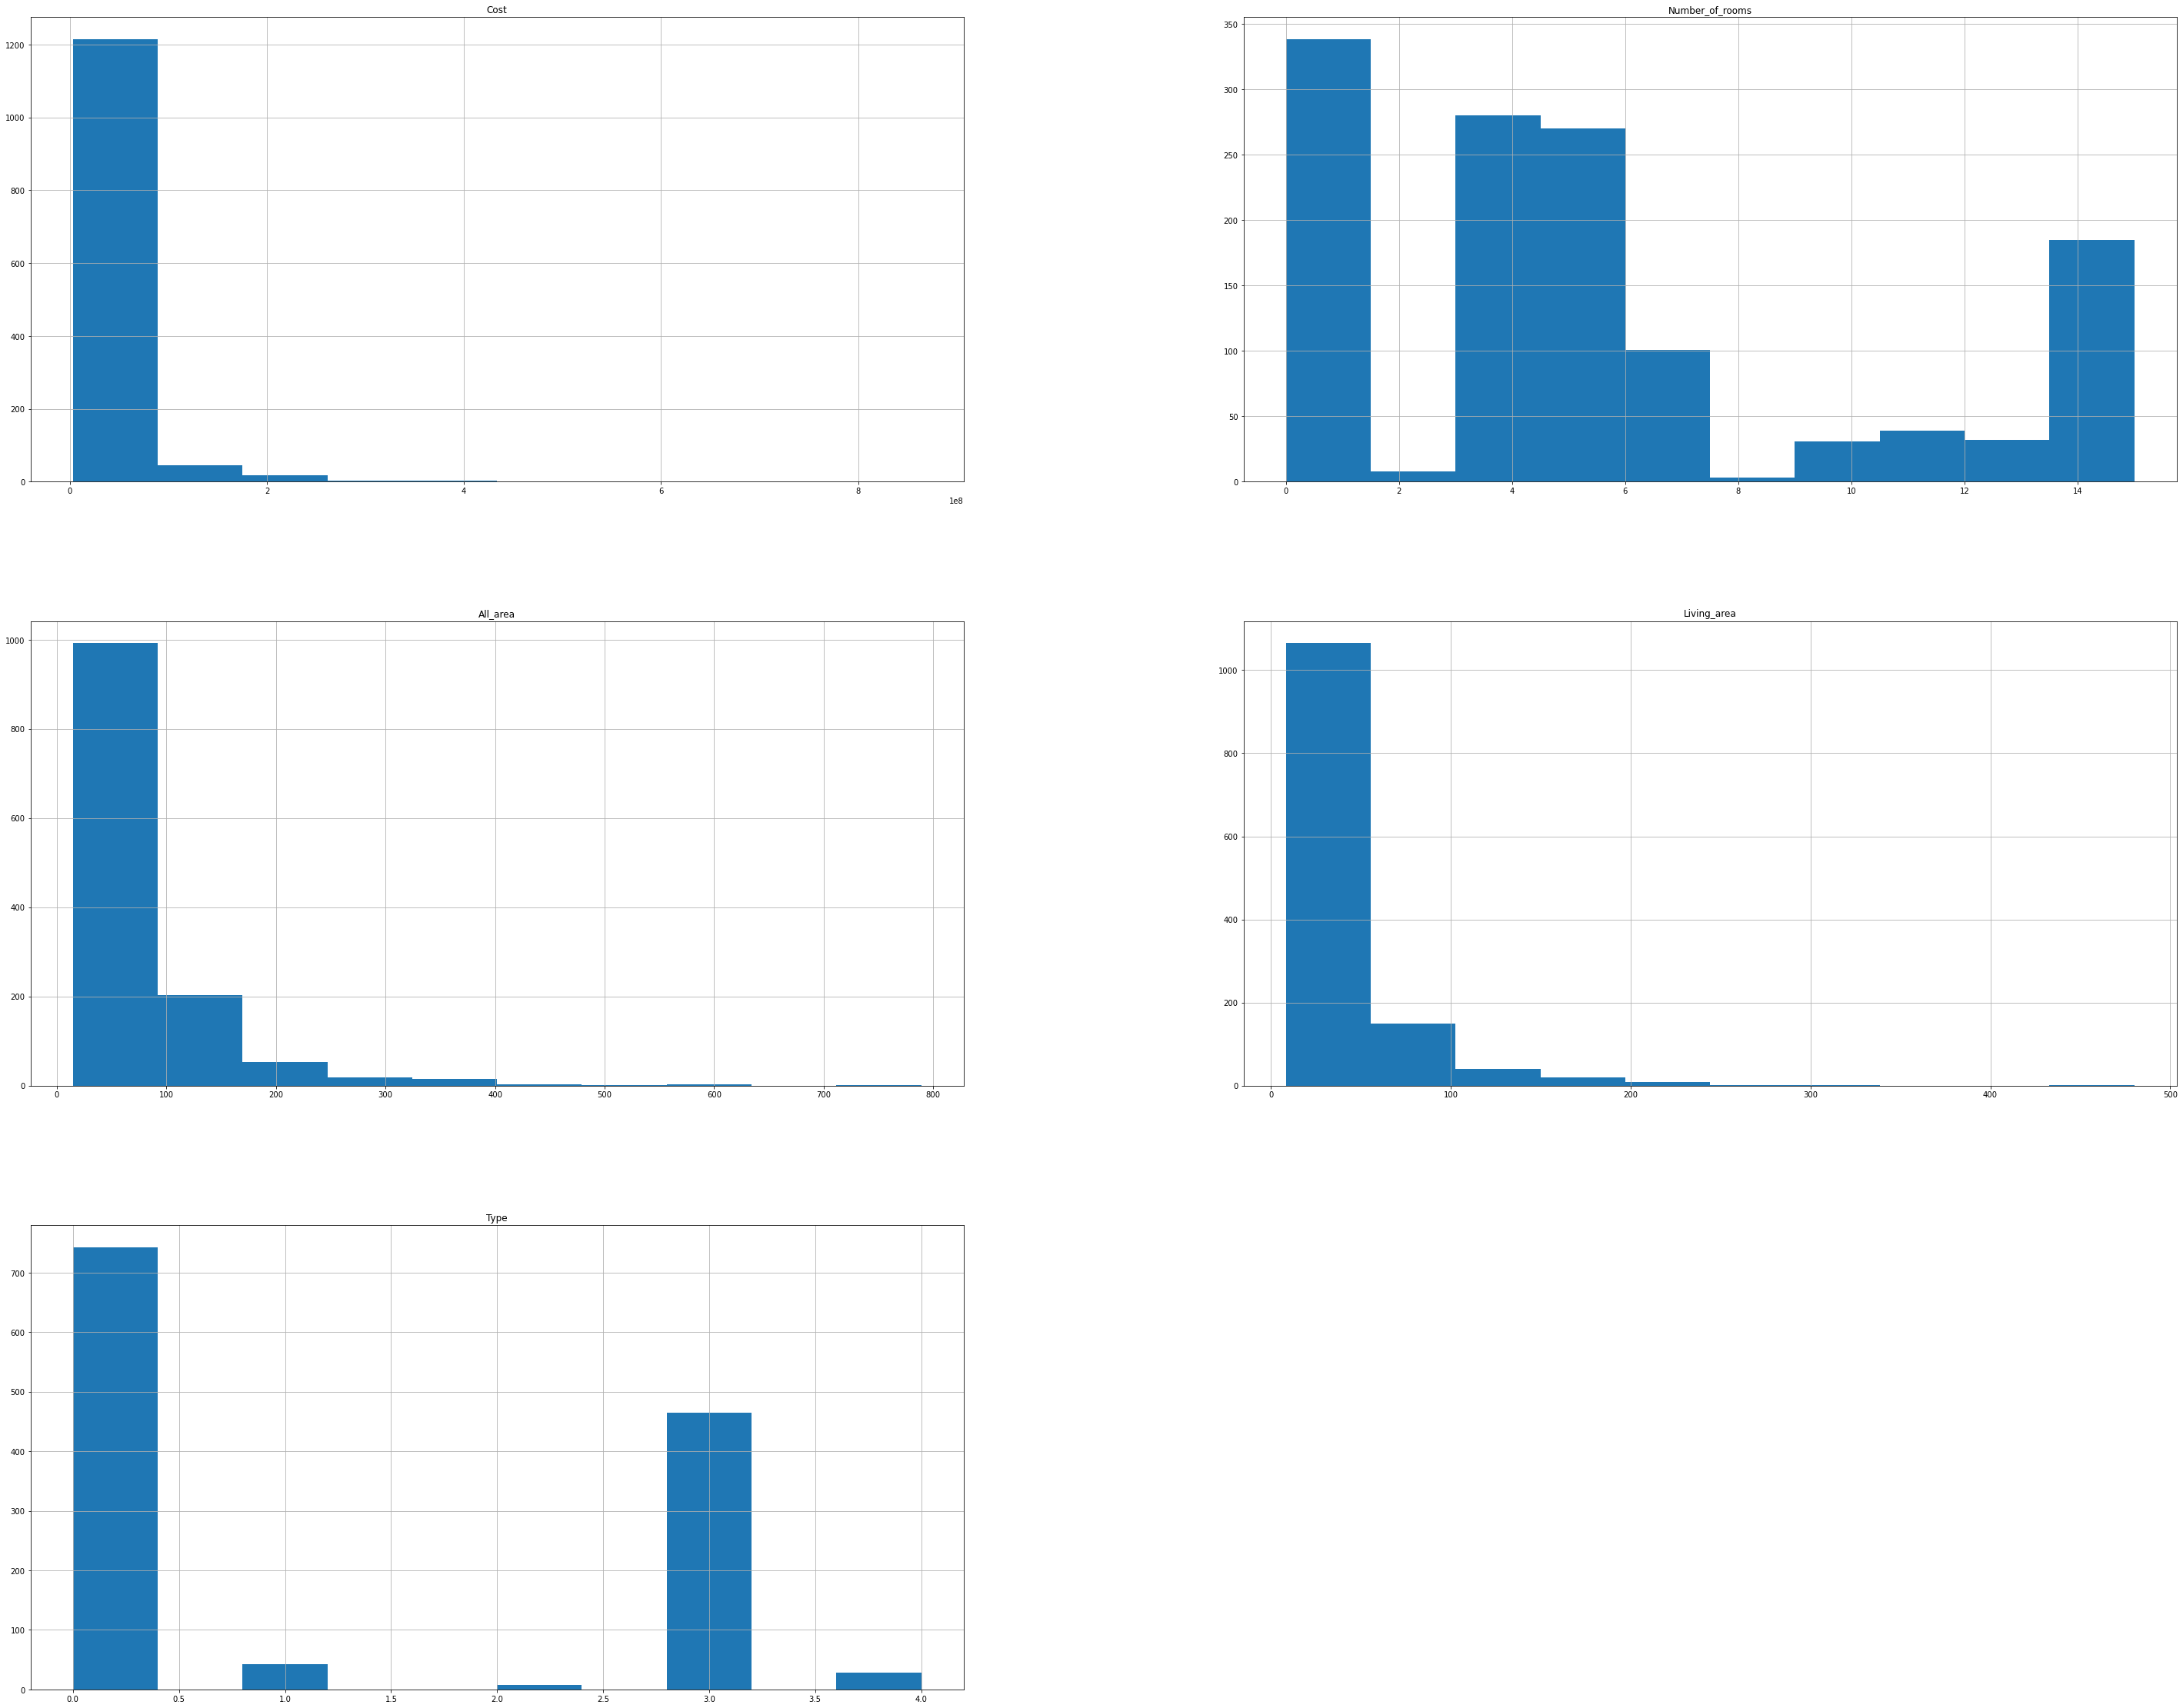

In [132]:
# визуализация данных
df.hist(figsize=(50, 40))

<AxesSubplot:xlabel='Cost'>

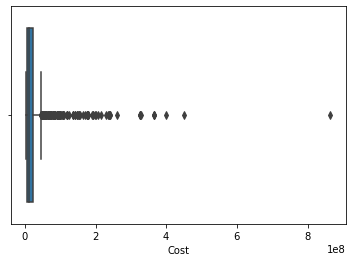

In [27]:
import seaborn as sns
sns.boxplot(x='Cost', data=df)

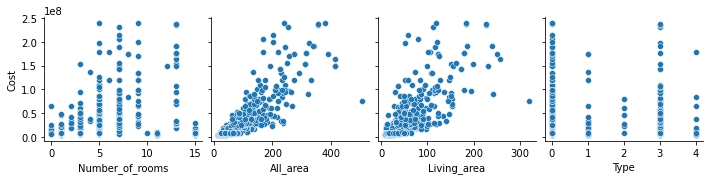

In [136]:
sns.pairplot(data=df,
                  y_vars=['Cost'],
                  x_vars=['Number_of_rooms', 'All_area', 'Living_area', 'Type'])

In [138]:
corr_table = df.corr()
corr_table

Cost  Number_of_rooms  All_area  Living_area      Type
Cost             1.000000         0.065625  0.857056     0.759542 -0.016314
Number_of_rooms  0.065625         1.000000  0.032758     0.128899  0.065332
All_area         0.857056         0.032758  1.000000     0.927203 -0.045148
Living_area      0.759542         0.128899  0.927203     1.000000 -0.111930
Type            -0.016314         0.065332 -0.045148    -0.111930  1.000000

Несмотря на то, что в рамках данного датасета присутсвуют выбросы по полной площади и жилой площади, было принято решение не удалять эти выбросы с целью сохранения репрезентативности, поскольку датасет имеет небольшой объем и не отображает в полной мере функциональные зависимости переменных.

## Обучение моделей

In [50]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
from sklearn.linear_model import (LinearRegression, ElasticNet, BayesianRidge)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import (train_test_split, cross_val_score)
from sklearn.metrics import (mean_squared_error, mean_absolute_error, r2_score)
from sklearn.model_selection import (train_test_split, GridSearchCV, cross_val_score)


In [152]:
X = df.drop(columns=['Cost'])
y = df['Cost']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def learn(model, *args, **kwargs):
    model = model(*args, **kwargs)
    model.fit(X_train, y_train)
    res = {}
    res['name'] = model.__class__.__name__
    res['r2_train'] = r2(y_train, model.predict(X_train))
    res['r2_test'] = r2(y_test, model.predict(X_test))
    res['mse_train'] = mse(y_train, model.predict(X_train)) ** 0.5
    res['mse_test'] = mse(y_test, model.predict(X_test)) ** 0.5
    res['mae_train'] = mean_absolute_error(y_train, model.predict(X_train)) 
    res['mae_test'] = mean_absolute_error(y_test, model.predict(X_test)) 
    res['params'] = kwargs
    return res
def learn_multiple_models(models):
    return pd.DataFrame([learn(model) for model in models])
models = [BayesianRidge, LinearRegression, Ridge, RidgeCV, LassoCV, RandomForestRegressor, GradientBoostingRegressor]
learn_multiple_models(models)

name  r2_train   r2_test     mse_train      mse_test  \
0              BayesianRidge  0.711139  0.658415  2.706342e+07  2.778081e+07   
1           LinearRegression  0.711626  0.657662  2.704063e+07  2.781141e+07   
2                      Ridge  0.711626  0.657663  2.704063e+07  2.781136e+07   
3                    RidgeCV  0.711626  0.657675  2.704063e+07  2.781087e+07   
4                    LassoCV  0.707795  0.649682  2.721962e+07  2.813369e+07   
5      RandomForestRegressor  0.967148  0.753920  9.126856e+06  2.357947e+07   
6  GradientBoostingRegressor  0.974367  0.787693  8.061986e+06  2.190169e+07   

      mae_train      mae_test params  
0  1.197096e+07  1.377332e+07     {}  
1  1.201596e+07  1.380029e+07     {}  
2  1.201589e+07  1.380023e+07     {}  
3  1.201523e+07  1.379966e+07     {}  
4  1.200886e+07  1.379409e+07     {}  
5  3.115653e+06  9.812810e+06     {}  
6  4.649055e+06  9.570085e+06     {}

In [153]:
# для сглаживания выбросов и выравнивания значений ошибок проведем нормализации
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
names = df.columns
d = scaler.fit_transform(df)

df = pd.DataFrame(d, columns=names)

In [154]:
# повторное проведение обучения
X = df.drop(columns=['Cost'])
y = df['Cost']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
learn_multiple_models(models)

name  r2_train   r2_test  mse_train  mse_test  \
0              BayesianRidge  0.711610  0.656863   0.031413  0.032345   
1           LinearRegression  0.711626  0.657662   0.031412  0.032307   
2                      Ridge  0.699355  0.626370   0.032073  0.033751   
3                    RidgeCV  0.699355  0.626370   0.032073  0.033751   
4                    LassoCV  0.710618  0.651061   0.031466  0.032617   
5      RandomForestRegressor  0.963262  0.752734   0.011212  0.027457   
6  GradientBoostingRegressor  0.974367  0.790990   0.009365  0.025244   

   mae_train  mae_test params  
0   0.013953  0.016041     {}  
1   0.013958  0.016031     {}  
2   0.013632  0.015879     {}  
3   0.013632  0.015879     {}  
4   0.013544  0.015738     {}  
5   0.003667  0.011357     {}  
6   0.005401  0.011011     {}

## Кросс-валидация

In [162]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
train_scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=3)
test_scores = cross_val_score(model, X_test, y_test, scoring='r2', cv=3)

In [163]:
print('r2_train_cross_val = ' + str(np.mean(train_scores)) + ', r2_test_cross_val = ' + str(np.mean(test_scores)))

r2_train_cross_val = 0.6573644062529761, r2_test_cross_val = 0.641539468849219


In [164]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
train_scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=3)
test_scores = cross_val_score(model, X_test, y_test, scoring='r2', cv=3)


In [165]:
print('r2_train_cross_val = ' + str(np.mean(train_scores)) + ', r2_test_cross_val = ' + str(np.mean(test_scores)))

r2_train_cross_val = 0.6420282244120598, r2_test_cross_val = 0.5916241185624714


## Поиск оптимальных гиперпараметров

In [159]:
#Для случайного леса
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)
rf_random.best_params_

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 1600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': True}

In [166]:
%%time
#Для градиентного бустинга
parameters_gbr = { 
                 "learning_rate": np.arange(0.1, 500.1, 100.0),
                 "n_estimators" :  range(50, 100, 10),
                 "subsample": np.arange(0.1, 1.0, 0.1),
                }
gbr = GradientBoostingRegressor()
grid_gbr = GridSearchCV(gbr, parameters_gbr)
grid_gbr.fit(X_train, y_train)
grid_gbr.best_params_

C:\Users\User\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:571: RuntimeWarning: invalid value encountered in double_scalars
  old_oob_score - loss_(y[~sample_mask],
C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:571: RuntimeWarning: invalid value encountered in double_scalars
  old_oob_score - loss_(y[~sample_mask],
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:691: RuntimeWarning: overflow encountered

Wall time: 1min 51s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [ 6.43465157e-001  6.89234210e-001  6.73644232e-001  6.00043275e-001
  5.66189546e-001  6.49929406e-001  6.94480852e-001  7.01842660e-001
  6.63878265e-001  6.72427314e-001  6.14345615e-001  6.30660790e-001
  6.23044372e-001  5.61229658e-001  6.31974116e-001  5.83183478e-001
  6.70709099e-001  6.93047272e-001  6.49755424e-001  6.16531966e-001
  6.38980499e-001  6.09992871e-001  6.49563764e-001  6.19964064e-001
  6.92142608e-001  6.14197686e-001  6.30694218e-001  6.54985090e-001
  5.94073132e-001  5.95495826e-001  6.01387500e-001  5.73107943e-001
  6.24644591e-001  6.71076008e-001  6.57924642e-001  6.36888648e-001
  5.92945323e-001  6.20648444e-001  6.26842377e-001  5.66205622e-001
  5.47215771e-001  6.57235425e-001  5.35190996e-001  6.93888312e-001
  6.21777323e-001 -5.37096423e+198 -3.19964897e+199 -1.39532658e+199
 -2.40406520e+199 -2.27275647e

{'learning_rate': 0.1, 'n_estimators': 50, 'subsample': 0.8}

In [161]:
learn(RandomForestRegressor, **rf_random.best_params_)

{'name': 'RandomForestRegressor',
 'r2_train': 0.8917961994974558,
 'r2_test': 0.7224169494912762,
 'mse_train': 0.01924128315617454,
 'mse_test': 0.029091512597973615,
 'mae_train': 0.006508089290310121,
 'mae_test': 0.011624233106166266,
 'params': {'n_estimators': 1600,
  'min_samples_split': 10,
  'min_samples_leaf': 1,
  'max_features': 'sqrt',
  'max_depth': None,
  'bootstrap': True}}

In [167]:
learn(GradientBoostingRegressor, **grid_gbr.best_params_)

{'name': 'GradientBoostingRegressor',
 'r2_train': 0.948281670556909,
 'r2_test': 0.763727057130894,
 'mse_train': 0.01330255359617897,
 'mse_test': 0.02683964863010353,
 'mae_train': 0.006988270298787633,
 'mae_test': 0.011228330958047261,
 'params': {'learning_rate': 0.1, 'n_estimators': 50, 'subsample': 0.8}}

## Выводы
Наилучшие показатели по выбранным моделям обучениям, согласно показателям кросс-валидации, демонстрируются по модели RandomForestRegressor. Согласно коэффицинту детерминации, модель нормально отображает функциональную связь данных. По результатам гридсерча метрики случайного леса и градиентного бустинга ухудшились, что укзывает на то, что стандартные параметры являются оптимальными.